In [2]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

# ДОМАШНЕЕ ЗАДАНИЕ 3. Классификация текстовых документов

Папулин С.Ю. (papulin.study@yandex.ru)

## Цель работы

Приобрести опыт решения практических задач по машинному обучению, таких как анализ и визуализация исходных данных, обучение, выбор и оценка качества моделей предсказания, посредством языка программирования Python.

## Вариант 

Чтобы узнать свой вариант, введите Вашу фамилию в соответствующее поле ниже и запустите ячейку:


In [3]:
surname = "Гейне" # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 3 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2




- **Вариант 1.** Набор электронных сообщений (emails)
    - файл: `data/emails.tsv`
    - [источник](http://csmining.org/index.php/spam-email-datasets.html)

- **Вариант 2.** Набор SMS сообщений (sms)
    - файл: `data/SMSSpamCollection`
    - [источник](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)

- **Вариант 3.** Набор рецензий на фильмы (reviews)
    - файл: `data/reviews.tsv`
    - [источник](http://www.cs.cornell.edu/people/pabo/movie-review-data/)

⚠️ **Замечание.** 
- Для всех объектов/методов/моделей `random_state = 123`


## Задание 1. Оценка качества классификации текстовых данных (2 балла)

1. Загрузите исходные данные
2. Разбейте загруженные данные на обучающее (train, 80%) и тестовое подмножества (test, 20%)
3. Переведите текстовые данные в векторный вид. Для этого воспользуйтесь средствами `sklearn` для трансформации текстовых документов в векторы TF-IDF (настроить на обучающем подмножестве, n-gram=1, слова в нижний регистр). 
4. Постройте на обучающем подмножестве следующие модели классификации:
    - K-ближайших соседей ($n=5$)
    - Логистическая регрессия ($C=1$)
    - Наивный Байес: модель Бернулли ($\alpha=1$)
    - Наивный Байес: полиномиальная модель ($\alpha=1$)
5. Определите качество классификации на тестовом подмножестве (`Balanced-Accuracy`, `R`, `P`, `F1`) ***для каждой модели?***
6. Определите время обучения и предсказания ***для каждой модели?*** ***time it без трансформации***
7. Свести все значения в один датафрейм и представить результат в виде таблицы

⚠️ **Замечание.** 
- Для модели Бернулли используйте бинарный вектор
- Параметры логистической регрессии: `penalty="l2"`, `fit_intercept=True`, `max_iter=100`, `C=1`, `solver="lbfgs"`, `random_state=12345`

## Задание 2. Оценка качества классификации текстовых данных посредством кросс-валидации (2 балла)

Повторите решение задания 1, но с использованием стратифицированной кросс-валидации k-folds (k=4) для разделения исходных данных

## Задание 3. Выбор модели (4 баллов)

1. Используя данные из задачи 1, разбейте обучающее подмножество (train) посредством стратифицированной кросс-валидации k-folds (k=4)
2. Обучите и протестируйте на разбитом обучающем подмножестве классификаторы со следующими параметрами:
    - количество соседей: `np.arange(1, 150, 20)`
    - параметр регуляризации: `np.logspace(-2, 10, 8, base=10)`
    - сглаживающий параметр: `np.logspace(-4, 1, 8, base=10)`
3. Постройте графики (параметры модели)-(`Balanced-Accuracy`) при обучении и валидации
4. Выберите лучшую модель для каждого метода, используя значение качества классификации (использовать `Balanced-Accuracy`) ***что значит лучшую модель? для каждой модели лучший параметр?***
5. Выбранные модели обучите на обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задание 1 п. 6)
6. Повторите шаги 2-5 для n-gram=2 и n-gram=(1,2)
7. Выведите в виде таблицы итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, метрики (`Balanced-Accuracy`, `R`, `P`, `F1`))
8. Сделайте выводы по полученным результатам (преимущества и недостатки методов)

## Задание 4. Оценка влияния количества признаков FeatureHasher на качество классификации (2 баллов)

Как будет меняться качество классификации для обозначенных ранее методов при использовании `FeatureHasher` (или `HashingVectorizer`) из пакета `sklearn` перед TF-IDF преобразованием.

Количество признаков: `np.logspace(1, 5, 5, base=10)`

⚠️ **Замечания** 
- Используйте лучшие модели из задания 3 при `1-gram`
- Для `FeatureHasher`/`HashingVectorizer` установите следующие параметры: `norm=None` и `alternate_sign=False`

---

# Решение

## Задание 1

Загрузим исходные данные в соответствии с вариантом: `smsspamcollection`.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

RANDOM_STATE = 123
DATA_FILE = 'smsspamcollection/SMSSpamCollection'

In [5]:
df = pd.read_csv(DATA_FILE, sep='\t', names=['label', 'text'])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Разобъём выборку на train и test в соотношении 80 на 20.

In [6]:
from sklearn.model_selection import train_test_split

X, y = df[['text']], df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, train_size=0.8)

In [7]:
X_train

,text
385,Double mins and txts 4 6months FREE Bluetooth ...
4003,Did you get any gift? This year i didnt get an...
1283,Ever green quote ever told by Jerry in cartoon...
2327,The Xmas story is peace.. The Xmas msg is love...
1103,Black shirt n blue jeans... I thk i c ü...
...,...
5218,I accidentally brought em home in the box
4060,Moby Pub Quiz.Win a £100 High Street prize if ...
1346,Que pases un buen tiempo or something like that
3454,Nowadays people are notixiquating the laxinorf...


In [8]:
y_train

385     spam
4003     ham
1283     ham
2327     ham
1103     ham
        ... 
5218     ham
4060    spam
1346     ham
3454     ham
3582     ham
Name: label, Length: 4457, dtype: object

Построим векторизаторы из класса `TfidfVectorizer`. Для модели Бернулли создадим бинарный векторизатор. Эти векторизаторы необходимо добавить перед моделями с помощью `Pipeline`.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase=True, stop_words=None, 
                             use_idf=True, ngram_range=(1,1),
                             smooth_idf=False)

vectorizer_bin = TfidfVectorizer(lowercase=True, stop_words=None, 
                             use_idf=True, ngram_range=(1,1),
                             smooth_idf=False, binary=True)

Для измерения времени создадим класс-обёртку над моделями `sklearn`. Класс будет засекать время перед вызовом методов базовых моделей, засекать время после их завершения, вычислять продолжительность операции и хранить в качестве поля.

In [10]:
from sklearn.base import BaseEstimator, RegressorMixin, is_regressor
from sklearn.utils.estimator_checks import check_estimator
import time

class TimedEstimator(BaseEstimator):
  def __init__(self, base_estimator) -> None:
    self.base_estimator = base_estimator
  
  def fit(self, X, y):
    start = time.time()
    self.base_estimator.fit(X, y)
    self.fit_time = time.time() - start
    return self
  
  def predict(self, X):
    start = time.time()
    predict = self.base_estimator.predict(X)
    self.predict_time = time.time() - start
    return predict

Поскольку векторизаторы требуют в качестве входных параметров одномерные массивы, в то время как некоторые функции требуют, чтобы `X` был двумерным, для совместимости может потребоваться дополнительный преобразователь для `X` перед векторизацией.

In [11]:
from sklearn.base import TransformerMixin

class Flattener(BaseEstimator, TransformerMixin):
  def __init__(self, column):
    self.column = column

  def fit(self, X, y):
    return self
  
  def transform(self, X):
    return X[self.column]
  
flattener = Flattener('text')

Соберём `Pipeline` из векторизаторов и моделей, обёрнутых в `TimedEstimator`.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

Создадим и сразу обучим модели на тренировочном множестве.

In [13]:
neighbors_model = KNeighborsClassifier(n_neighbors=5)
logistic_model = LogisticRegression(C=1, penalty="l2", fit_intercept=True, max_iter=100, 
                              solver="lbfgs", random_state=RANDOM_STATE)
bern_model = BernoulliNB(alpha=1)
poly_model = MultinomialNB(alpha=1)

neighbors = Pipeline([
  ('flattener', flattener),
  ('vectorizer', vectorizer),
  ('model', TimedEstimator(neighbors_model))
]).fit(X_train, y_train)
logistic = Pipeline([
  ('flattener', flattener),
  ('vectorizer', vectorizer),
  ('model', TimedEstimator(logistic_model))
]).fit(X_train, y_train)
bern = Pipeline([
  ('flattener', flattener),
  ('vectorizer', vectorizer_bin),
  ('model', TimedEstimator(bern_model))
]).fit(X_train, y_train)
poly = Pipeline([
  ('flattener', flattener),
  ('vectorizer', vectorizer),
  ('model', TimedEstimator(poly_model))
]).fit(X_train, y_train)

In [14]:
neighbors[0]

Flattener(column='text')

Дополнительно создадим методы для оценки времени в качестве метрики модели. Возможно создать такой метод, который бы вычислял время без использования класса-обёртки, однако в этом случае возникнет проблема с оценкой времени обучения. При использовании кросс-валидации и при поиске значения гиперпараметра метрики вычисляются с использованием только валидационной части, на которой обучение модели представляется неоптимальным, а без класса-обёртки и без обучения внутри `scorer` требуемую метрику не получить. По этой причине разрабатываемые методы оценки работают исключительно с разработанной обёрткой и просто возвращают значения соответствующих полей.

In [15]:
from sklearn.metrics import make_scorer

def fit_time_score(estimator, X, y):
  if type(estimator) is Pipeline:
    return estimator[-1].fit_time
  return estimator.fit_time
fit_time_scorer = make_scorer(fit_time_score, greater_is_better=False)

def predict_time_score(estimator, X, y):
  estimator.predict(X)
  if type(estimator) is Pipeline:
    return estimator[-1].predict_time
  return estimator.predict_time
predict_time_scorer = make_scorer(predict_time_score, greater_is_better=False)

Определим качество каждой из моделей на тестовом множестве.

In [16]:
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, f1_score

def metrics(model, X, y, model_name):
  metrics = {
    "Model": model_name,
    "fit_time": fit_time_score(model, X, y), 
    "predict_time": predict_time_score(model, X, y),
    "balanced_accuracy": balanced_accuracy_score(y, model.predict(X)),
    "Reacll": recall_score(y, model.predict(X), pos_label='spam'),
    "Precision": precision_score(y, model.predict(X), pos_label='spam'),
    "F1": f1_score(y, model.predict(X), pos_label='spam')
  }
  return metrics

In [17]:
met_neighbors = metrics(neighbors, X_test, y_test, "KNeighborsClassifier")
met_logistic = metrics(logistic, X_test, y_test, "LogisticRegression")
met_bern = metrics(bern, X_test, y_test,"BernoulliNB")
met_poly = metrics(poly, X_test, y_test, "MultinomialNB")

Представим результаты в DataFrame.

In [18]:
data = [met_neighbors,met_logistic,met_bern, met_poly]

res_holdout = pd.DataFrame(data=data)
res_holdout

,Model,fit_time,predict_time,balanced_accuracy,Reacll,Precision,F1
0,KNeighborsClassifier,0.003490,0.534033,0.656863,0.313725,1.000000,0.477612
1,LogisticRegression,0.132358,0.000402,0.897653,0.797386,0.983871,0.880866
2,BernoulliNB,0.014020,0.000888,0.930853,0.862745,0.992481,0.923077
3,MultinomialNB,0.008423,0.000269,0.856209,0.712418,1.000000,0.832061


Минимальным временем обучения обладает модель `KNeigbors`, но при этом она обладает значительно большим временем предсказания. Это связано с тем, что как такового обучения в модели нет: она просто хранит в себе обучающую выборку, а при предсказании ищет расстояние до каждого наблюдения и определяет класс по ближайшим соседям. Никаких вычислений при обучении нет, но при предсказании требуется много вычислений.

Модели с наивынм байесом требуют малого времени обучения и обладают малым временем предсказания. Модель Бернулли обладает наивысшей сбалансированной точностью из всех моделей. Она же обладает наилучшим показателем Recall, что свидетельствует о том, что модель лучше подходит для задачи определения спама: наибольшая доля распознанного спама. При этом Precision тоже достаточно высокий, а значит кол-во сообщений, ошибочно помеченных как спам, достаточно мало.

## Задание 2

Повторим решение задания 1, но с использованием `StratifiedKFold`.

In [19]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer

precision = make_scorer(precision_score, pos_label='spam')
recall = make_scorer(recall_score, pos_label='spam')
f1 = make_scorer(f1_score, pos_label='spam')
balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

scores = {
  "fit_time": fit_time_score,
  "predict_time": predict_time_score,
  "balanced_accuracy": balanced_accuracy_scorer,
  "precision": precision,
  "recall": recall,
  "f1": f1
}

kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=RANDOM_STATE)

Функция `cross_validate` требует, чтобы `X` был матрицей. Именно для неё был добавлен трансформер `Flatten` в `Pipeline`.

In [20]:
neighbors_score = cross_validate(neighbors, X, y, cv=kfold, scoring=scores)
logistic_score = cross_validate(logistic, X, y, cv=kfold, scoring=scores)
bern_score = cross_validate(bern, X, y, cv=kfold, scoring=scores)
poly_score = cross_validate(poly, X, y, cv=kfold, scoring=scores)

Соберём DataFrame из полученных оценок.

In [21]:
data = [["KNeighborsClassifier"] + [v.mean() for _, v in neighbors_score.items()],
        ["LogisticRegression"] + [v.mean() for _, v in logistic_score.items()],
        ["BernoulliNB"] + [v.mean() for _, v in bern_score.items()],
        ["MultinomialNB"] + [v.mean() for _, v in poly_score.items()]]

labels = ["model"] + [k for k, _ in neighbors_score.items()]

res_kfold = pd.DataFrame(data=data, columns=labels)
res_kfold

,model,fit_time,score_time,test_fit_time,test_predict_time,test_balanced_accuracy,test_precision,test_recall,test_f1
0,KNeighborsClassifier,0.078118,1.419465,0.003036,0.615297,0.708661,0.998106,0.417529,0.571298
1,LogisticRegression,0.158297,0.098795,0.079282,0.000277,0.884247,0.989612,0.769737,0.865733
2,BernoulliNB,0.075385,0.063196,0.008822,0.000736,0.911900,0.993558,0.824629,0.901201
3,MultinomialNB,0.062865,0.058647,0.007676,0.000241,0.845394,1.000000,0.690788,0.816993


Сравним полученные результаты с результатами задания 1.

In [22]:
res_holdout

,Model,fit_time,predict_time,balanced_accuracy,Reacll,Precision,F1
0,KNeighborsClassifier,0.003490,0.534033,0.656863,0.313725,1.000000,0.477612
1,LogisticRegression,0.132358,0.000402,0.897653,0.797386,0.983871,0.880866
2,BernoulliNB,0.014020,0.000888,0.930853,0.862745,0.992481,0.923077
3,MultinomialNB,0.008423,0.000269,0.856209,0.712418,1.000000,0.832061


Можно заметить, что время хоть и отличается, но незначительно. Качественные заключения остаются без изменений.

В случае кросс-валидации предсказания дольше всего вычислялись для модели K-ближайших соседей, что соотносится с результатами отложенной выборки. Модель Бернулли теперь уступает по времени предсказания полиномиальной модели; при этом хоть и размер выборки для предсказаний сильно сократился, время предсказания модели Бернулли практически не изменилось.

Как и ранее, модель Бернулли обладает наивысшими значениями метрик.

## Задание 3

Для решения задания воспользуемся `GridSearchCV`. Этот класс позволяет провести кросс-валидацию, обучить модель с различными параметрами и оценить по набору метрик. Класс также позволяет обучить модель с лучшими параметрами на всём датасете и получить время этого обучения.

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
neighbors_params = {
  "model__base_estimator__n_neighbors": np.arange(1, 150, 20)
}
logistic_params = {
  "model__base_estimator__C": np.logspace(-2, 10, 8, base=10)
}
bayes_params = {
  "model__base_estimator__alpha": np.logspace(-4, 1, 8, base=10)
}

### `n_gram = 1`

Рассмотрим модели на векторах, построенных при `n_gram = 1`. Воспользуемся `GridSearchCV` для подбора параметров и получения метрик.

In [25]:
neighbors_grid1 = GridSearchCV(neighbors, param_grid=neighbors_params,
                              scoring='balanced_accuracy',
                              refit=True,
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)
logistic_grid1 = GridSearchCV(logistic, param_grid=logistic_params,
                              scoring='balanced_accuracy',
                              refit=True,
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)
bern_grid1 = GridSearchCV(bern, param_grid=bayes_params,
                              scoring='balanced_accuracy',
                              refit=True,
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)
poly_grid1 = GridSearchCV(poly, param_grid=bayes_params,
                              scoring='balanced_accuracy',
                              refit=True,
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)

Построим графики зависимости `Balanced-Accuracy` от рассматриваемых параметров. На рисунке 1 представлены графики зависемостей для каждой из моделей.

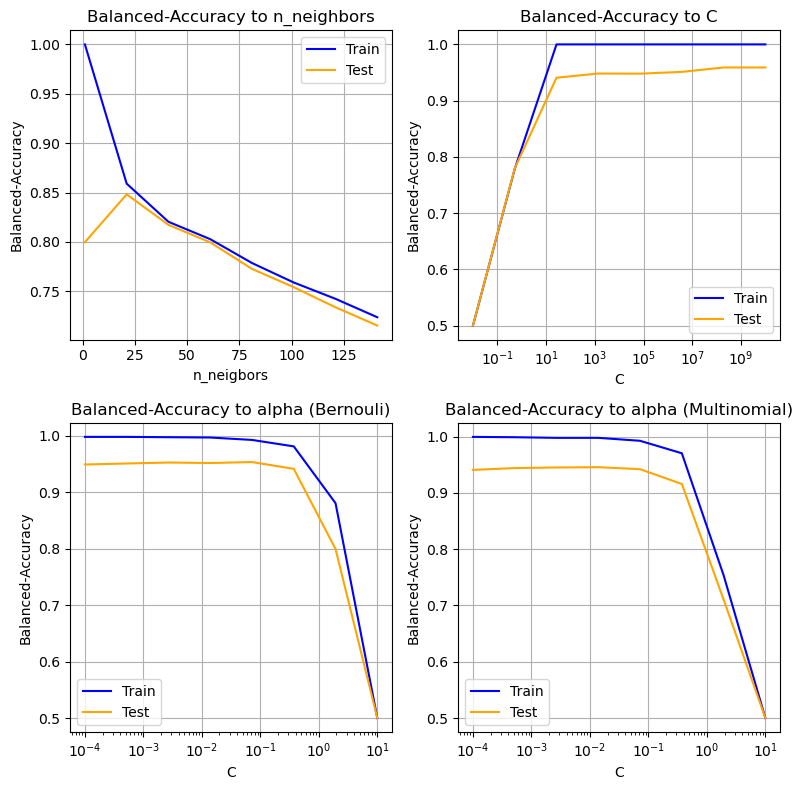

In [26]:
plt.figure(1, figsize=[8, 8])

plt.subplot(2,2,1)
plt.title("Balanced-Accuracy to n_neighbors")
plt.plot(np.arange(1, 150, 20), neighbors_grid1.cv_results_["mean_train_score"], "-", color="blue", label="Train")
plt.plot(np.arange(1, 150, 20), neighbors_grid1.cv_results_["mean_test_score"], "-", color="orange", label="Test")
plt.xlabel("n_neigbors")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.subplot(2,2,2)
plt.title("Balanced-Accuracy to С")
plt.plot(np.logspace(-2, 10, 8, base=10), logistic_grid1.cv_results_["mean_train_score"], "-", color="blue", label="Train")
plt.plot(np.logspace(-2, 10, 8, base=10), logistic_grid1.cv_results_["mean_test_score"], "-", color="orange", label="Test")
plt.xlabel("C")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,3)
plt.title("Balanced-Accuracy to alpha (Bernouli)")
plt.plot(np.logspace(-4, 1, 8, base=10), bern_grid1.cv_results_["mean_train_score"], "-", color="blue", label="Train")
plt.plot(np.logspace(-4, 1, 8, base=10), bern_grid1.cv_results_["mean_test_score"], "-", color="orange", label="Test")
plt.xlabel("C")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,4)
plt.title("Balanced-Accuracy to alpha (Multinomial)")
plt.plot(np.logspace(-4, 1, 8, base=10), poly_grid1.cv_results_["mean_train_score"], "-", color="blue", label="Train")
plt.plot(np.logspace(-4, 1, 8, base=10), poly_grid1.cv_results_["mean_test_score"], "-", color="orange", label="Test")
plt.xlabel("C")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()
plt.show()

plt.show()

В большинстве случаев точность моделей растёт с ростом параметров до определённого предела, а затем стремится к 0. Исключением является модель логистической регрессии, точность которой не снижается с ростом параметра, а продолжает стремиться к 1, однако на проверочных множествах так и не достигает этого значения.

Объявим функцию, которая позволит получить метрики лучшей модели. Использование параметра `retrain` позволяет получить уже обученную на обучающем подможестве модель. Она уже хранит время обучения на обучающем множестве. Функция `fit_time_score` предварительно готовит предсказание, для этого в неё передаётся тестовое множество.

In [27]:
def best_metrics(search:GridSearchCV,X, y, model_name:str, n_gram_range:tuple[int, int]):
  return {
    "Model": model_name,
    "M-gram range": n_gram_range,
    "Best param": search.cv_results_["params"][search.best_index_],
    "Fit time": fit_time_score(search.best_estimator_, X, y),
    "Predict time": predict_time_score(search.best_estimator_, X, y),
    "balanced_accuracy": balanced_accuracy_score(y, search.best_estimator_.predict(X)),
    "Reacll": recall_score(y, search.best_estimator_.predict(X), pos_label='spam'),
    "Precision": precision_score(y, search.best_estimator_.predict(X), pos_label='spam'),
    "F1": f1_score(y, search.best_estimator_.predict(X), pos_label='spam')
  }

Сохраним в DataFrame результаты поиска при `n_gram=1`.

In [50]:
data = [best_metrics(neighbors_grid1, X_test, y_test, "KNeighborsClassifier", (1,1)),
        best_metrics(logistic_grid1, X_test, y_test, "LogisticRegression", (1,1)),
        best_metrics(bern_grid1, X_test, y_test, "BernoulliNB", (1,1)),
        best_metrics(poly_grid1, X_test, y_test, "MultinomialNB", (1,1))]

res_gridsearch = pd.DataFrame(data)
res_gridsearch

,Model,M-gram range,Best param,Fit time,Predict time,balanced_accuracy,Reacll,Precision,F1
0,KNeighborsClassifier,"(1, 1)",{'model__base_estimator__n_neighbors': 21},0.003633,0.611017,0.864974,0.732026,0.982456,0.838951
1,LogisticRegression,"(1, 1)",{'model__base_estimator__C': 193069772.88832456},0.073951,0.000379,0.960934,0.928105,0.959459,0.943522
2,BernoulliNB,"(1, 1)",{'model__base_estimator__alpha': 0.07196856730...,0.010303,0.000694,0.960784,0.921569,1.000000,0.959184
3,MultinomialNB,"(1, 1)",{'model__base_estimator__alpha': 0.01389495494...,0.007847,0.000283,0.956997,0.915033,0.992908,0.952381


### `n_gram = 2`

Рассмотрим модели на векторах, построенных при `n_gram = 2`. Для этого изменим векторизаторы и повторим поиск гиперпараметров.

In [29]:
neighbors['vectorizer'].ngram_range = (2,2)
logistic['vectorizer'].ngram_range = (2,2)
bern['vectorizer'].ngram_range = (2,2)
poly['vectorizer'].ngram_range = (2,2)

neighbors_grid2 = GridSearchCV(neighbors, param_grid=neighbors_params,
                              scoring='balanced_accuracy',
                              refit=True,
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)
logistic_grid2 = GridSearchCV(logistic, param_grid=logistic_params,
                              scoring='balanced_accuracy',
                              refit=True,
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)
bern_grid2 = GridSearchCV(bern, param_grid=bayes_params,
                              scoring='balanced_accuracy',
                              refit=True,
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)
poly_grid2 = GridSearchCV(poly, param_grid=bayes_params,
                              scoring='balanced_accuracy',
                              refit=True,
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)

На рисунке 2 представлены графики зависимости `balanced_accuracy` от параметров моделей.

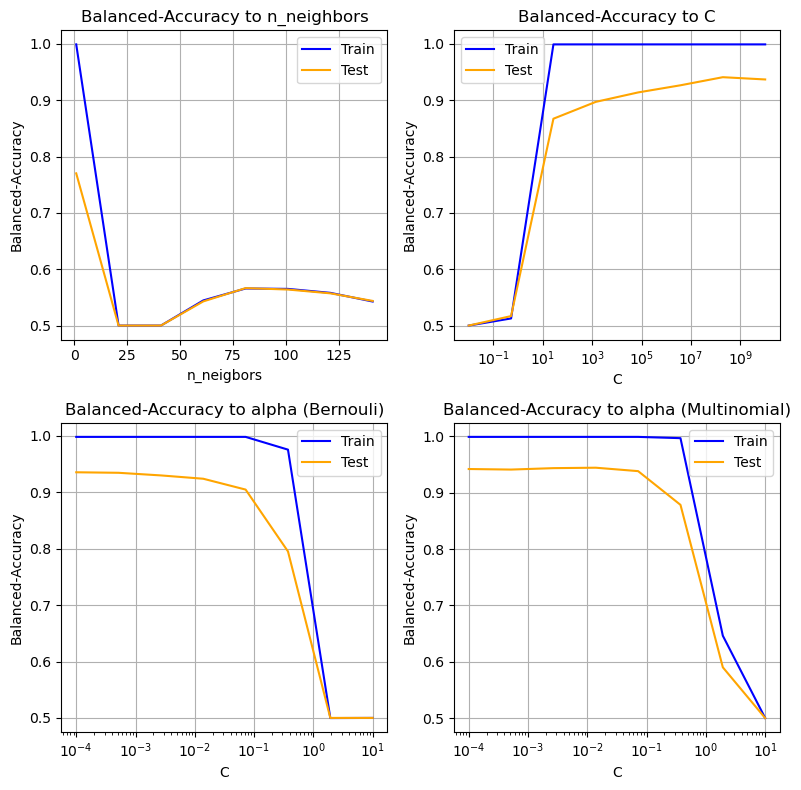

In [30]:
plt.figure(2, figsize=[8, 8])

plt.subplot(2,2,1)
plt.title("Balanced-Accuracy to n_neighbors")
plt.plot(np.arange(1, 150, 20), neighbors_grid2.cv_results_["mean_train_score"], "-", color="blue", label="Train")
plt.plot(np.arange(1, 150, 20), neighbors_grid2.cv_results_["mean_test_score"], "-", color="orange", label="Test")
plt.xlabel("n_neigbors")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.subplot(2,2,2)
plt.title("Balanced-Accuracy to С")
plt.plot(np.logspace(-2, 10, 8, base=10), logistic_grid2.cv_results_["mean_train_score"], "-", color="blue", label="Train")
plt.plot(np.logspace(-2, 10, 8, base=10), logistic_grid2.cv_results_["mean_test_score"], "-", color="orange", label="Test")
plt.xlabel("C")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,3)
plt.title("Balanced-Accuracy to alpha (Bernouli)")
plt.plot(np.logspace(-4, 1, 8, base=10), bern_grid2.cv_results_["mean_train_score"], "-", color="blue", label="Train")
plt.plot(np.logspace(-4, 1, 8, base=10), bern_grid2.cv_results_["mean_test_score"], "-", color="orange", label="Test")
plt.xlabel("C")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,4)
plt.title("Balanced-Accuracy to alpha (Multinomial)")
plt.plot(np.logspace(-4, 1, 8, base=10), poly_grid2.cv_results_["mean_train_score"], "-", color="blue", label="Train")
plt.plot(np.logspace(-4, 1, 8, base=10), poly_grid2.cv_results_["mean_test_score"], "-", color="orange", label="Test")
plt.xlabel("C")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()
plt.show()

plt.show()

В отличие от `n_gram = 1`, в данном случае точность `KNeighborsClassifier` практически сразу сильно снижается, но позже немного вырастает, хоть и не достигает той точности, что была при малых значениях `k`. Поведение других моделей практически не отличается от ранее наблюдаемых графиков, но точность на проверочном множестве визуально кажется ниже, чем раньше.

Проведём подсчёт метрик и добавим их к уже имеющимся в таблице.

In [51]:
data = [best_metrics(neighbors_grid2, X_test, y_test, "KNeighborsClassifier", (2,2)),
        best_metrics(logistic_grid2, X_test, y_test, "LogisticRegression", (2,2)),
        best_metrics(bern_grid2, X_test, y_test, "BernoulliNB", (2,2)),
        best_metrics(poly_grid2, X_test, y_test, "MultinomialNB", (2,2))]

res_gridsearch = pd.concat([res_gridsearch, pd.DataFrame(data)], ignore_index=True)
res_gridsearch

,Model,M-gram range,Best param,Fit time,Predict time,balanced_accuracy,Reacll,Precision,F1
0,KNeighborsClassifier,"(1, 1)",{'model__base_estimator__n_neighbors': 21},0.003633,0.611017,0.864974,0.732026,0.982456,0.838951
1,LogisticRegression,"(1, 1)",{'model__base_estimator__C': 193069772.88832456},0.073951,0.000379,0.960934,0.928105,0.959459,0.943522
2,BernoulliNB,"(1, 1)",{'model__base_estimator__alpha': 0.07196856730...,0.010303,0.000694,0.960784,0.921569,1.000000,0.959184
3,MultinomialNB,"(1, 1)",{'model__base_estimator__alpha': 0.01389495494...,0.007847,0.000283,0.956997,0.915033,0.992908,0.952381
4,KNeighborsClassifier,"(2, 2)",{'model__base_estimator__n_neighbors': 1},0.003019,0.463863,0.777778,0.555556,1.000000,0.714286
5,LogisticRegression,"(2, 2)",{'model__base_estimator__C': 193069772.88832456},0.355015,0.000372,0.941774,0.908497,0.852761,0.879747
6,BernoulliNB,"(2, 2)",{'model__base_estimator__alpha': 0.0001},0.009562,0.001463,0.920009,0.843137,0.977273,0.905263
7,MultinomialNB,"(2, 2)",{'model__base_estimator__alpha': 0.01389495494...,0.009212,0.000455,0.918450,0.843137,0.955556,0.895833


### `n_gram = (1,2)`

Рассмотрим модели на векторах, построенных при `n_gram = (1,2)`. Для этого изменим векторизаторы и повторим поиск гиперпараметров.

In [32]:
neighbors['vectorizer'].ngram_range = (1,2)
logistic['vectorizer'].ngram_range = (1,2)
bern['vectorizer'].ngram_range = (1,2)
poly['vectorizer'].ngram_range = (1,2)

neighbors_grid12 = GridSearchCV(neighbors, param_grid=neighbors_params,
                              scoring='balanced_accuracy',
                              refit=True,
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)
logistic_grid12 = GridSearchCV(logistic, param_grid=logistic_params,
                              scoring='balanced_accuracy',
                              refit=True,
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)
bern_grid12 = GridSearchCV(bern, param_grid=bayes_params,
                              scoring='balanced_accuracy',
                              refit=True,
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)
poly_grid12 = GridSearchCV(poly, param_grid=bayes_params,
                              scoring='balanced_accuracy',
                              refit=True,
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)

На рисунке 3 представлены графики зависимости `balanced_accuracy` от параметров моделей.

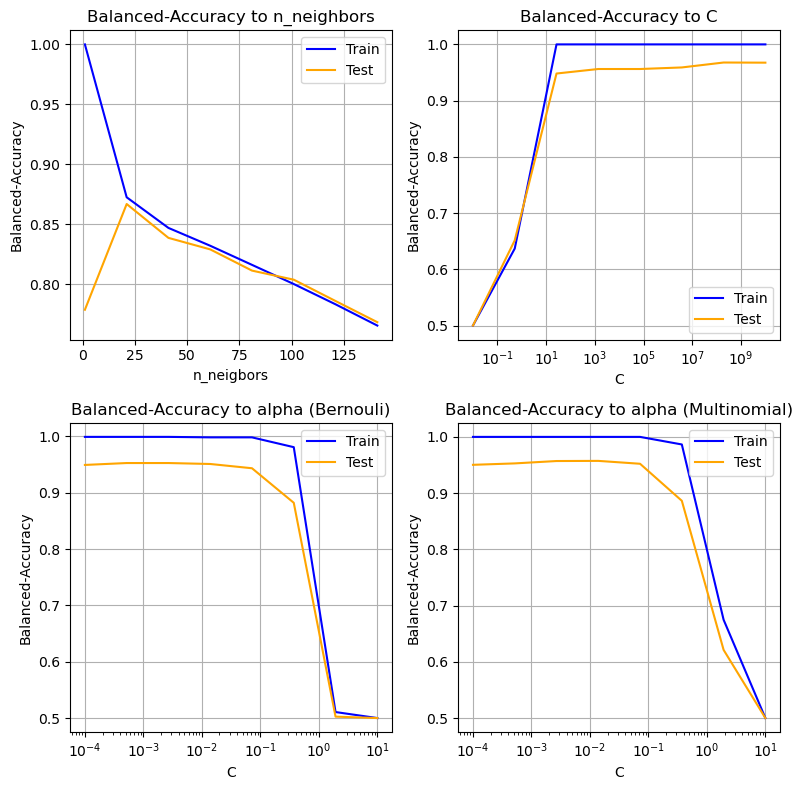

In [33]:
plt.figure(3, figsize=[8, 8])

plt.subplot(2,2,1)
plt.title("Balanced-Accuracy to n_neighbors")
plt.plot(np.arange(1, 150, 20), neighbors_grid12.cv_results_["mean_train_score"], "-", color="blue", label="Train")
plt.plot(np.arange(1, 150, 20), neighbors_grid12.cv_results_["mean_test_score"], "-", color="orange", label="Test")
plt.xlabel("n_neigbors")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.subplot(2,2,2)
plt.title("Balanced-Accuracy to С")
plt.plot(np.logspace(-2, 10, 8, base=10), logistic_grid12.cv_results_["mean_train_score"], "-", color="blue", label="Train")
plt.plot(np.logspace(-2, 10, 8, base=10), logistic_grid12.cv_results_["mean_test_score"], "-", color="orange", label="Test")
plt.xlabel("C")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,3)
plt.title("Balanced-Accuracy to alpha (Bernouli)")
plt.plot(np.logspace(-4, 1, 8, base=10), bern_grid12.cv_results_["mean_train_score"], "-", color="blue", label="Train")
plt.plot(np.logspace(-4, 1, 8, base=10), bern_grid12.cv_results_["mean_test_score"], "-", color="orange", label="Test")
plt.xlabel("C")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,4)
plt.title("Balanced-Accuracy to alpha (Multinomial)")
plt.plot(np.logspace(-4, 1, 8, base=10), poly_grid12.cv_results_["mean_train_score"], "-", color="blue", label="Train")
plt.plot(np.logspace(-4, 1, 8, base=10), poly_grid12.cv_results_["mean_test_score"], "-", color="orange", label="Test")
plt.xlabel("C")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()
plt.show()

plt.show()

Графики при `n_gram=(1,2)` схожи с графиками при `n_gram=1`. Поведение модели k-ближайших соседей снова соответствует ожидаемому: точность растёт до определённого предела, а затем снижается. Точность на проверочных множествах в целом при этом возрасла (как минимум на графике для `KNeighborsClassifier`).

Проведём подсчёт метрик и добавим их к уже имеющимся в таблице.

In [52]:
data = [best_metrics(neighbors_grid12, X_test, y_test, "KNeighborsClassifier", (1,2)),
        best_metrics(logistic_grid12, X_test, y_test, "LogisticRegression", (1,2)),
        best_metrics(bern_grid12, X_test, y_test, "BernoulliNB", (1,2)),
        best_metrics(poly_grid12, X_test, y_test, "MultinomialNB", (1,2))]

res_gridsearch = pd.concat([res_gridsearch, pd.DataFrame(data)], ignore_index=True)
res_gridsearch

,Model,M-gram range,Best param,Fit time,Predict time,balanced_accuracy,Reacll,Precision,F1
0,KNeighborsClassifier,"(1, 1)",{'model__base_estimator__n_neighbors': 21},0.003633,0.611017,0.864974,0.732026,0.982456,0.838951
1,LogisticRegression,"(1, 1)",{'model__base_estimator__C': 193069772.88832456},0.073951,0.000379,0.960934,0.928105,0.959459,0.943522
2,BernoulliNB,"(1, 1)",{'model__base_estimator__alpha': 0.07196856730...,0.010303,0.000694,0.960784,0.921569,1.000000,0.959184
3,MultinomialNB,"(1, 1)",{'model__base_estimator__alpha': 0.01389495494...,0.007847,0.000283,0.956997,0.915033,0.992908,0.952381
4,KNeighborsClassifier,"(2, 2)",{'model__base_estimator__n_neighbors': 1},0.003019,0.463863,0.777778,0.555556,1.000000,0.714286
5,LogisticRegression,"(2, 2)",{'model__base_estimator__C': 193069772.88832456},0.355015,0.000372,0.941774,0.908497,0.852761,0.879747
6,BernoulliNB,"(2, 2)",{'model__base_estimator__alpha': 0.0001},0.009562,0.001463,0.920009,0.843137,0.977273,0.905263
7,MultinomialNB,"(2, 2)",{'model__base_estimator__alpha': 0.01389495494...,0.009212,0.000455,0.918450,0.843137,0.955556,0.895833
8,KNeighborsClassifier,"(1, 2)",{'model__base_estimator__n_neighbors': 21},0.004178,1.413267,0.887849,0.777778,0.983471,0.868613
9,LogisticRegression,"(1, 2)",{'model__base_estimator__C': 193069772.88832456},0.326656,0.000247,0.973486,0.954248,0.954248,0.954248


### Выводы

Использование `GridSearchCV` для подбора значений гиперпараметров позволило повысить значения всех метрик. 

Метод k-ближайших соседей всё ещё требует очень малого времени для обучения, но очень большого времени для предсказания. При этом метрики этой модели являются худшими для каждого значения `n_gram`.

С ростом `n_gram` растёт и время обучения и предсказания, но взамен появляется возможность повысить точность моделей в некоторых случаях (к примеру, точность логистической регрессии увеличиалсь). Однако в среднем `balanced_accuracy` всё же выше для `n_gram=1`. При `n_gram=2` значения метрик снижаются, а при `n_gram=(1,2)` они достигают приблизительно прежних значений. Необходимость повышения значения `n_gram` в связи с этим сомнительна: времени требуется больше, но существенного прироста в метриках не наблюдается.

## Задание 4

Соберём новые пайплайны на основе ранее использовавшихся, но с добавлением `HashingVectorizer`. На вход этого векторизатора подаётся набор текстов, на выходе получается набор векторов. Чтобы затем получить TF-IDF вектора, необходимо использовать `TfidfTransformer`.

In [35]:
# extracting best params
best_n = list(neighbors_grid1.best_params_.values())[0]
best_C = list(logistic_grid1.best_params_.values())[0]
best_alpha_bern = list(bern_grid1.best_params_.values())[0]
best_alpha_poly = list(poly_grid1.best_params_.values())[0]

In [36]:
from sklearn.feature_extraction.text import HashingVectorizer, TfidfTransformer

hasher = HashingVectorizer(norm=None, alternate_sign=False, ngram_range=(1,1))
tfidftransform = TfidfTransformer()

neighbors_hash = Pipeline([
  ('flattener', flattener),
  ('hasher', hasher),
  ('vectorizer', tfidftransform),
  ('model', TimedEstimator(neighbors_model.set_params(n_neighbors=best_n)))
])
logistic_hash = Pipeline([
  ('flattener', flattener),
  ('hasher', hasher),
  ('vectorizer', tfidftransform),
  ('model', TimedEstimator(logistic_model.set_params(C=best_C)))
])
bern_hash = Pipeline([
  ('flattener', flattener),
  ('hasher', hasher),
  ('vectorizer', tfidftransform),
  ('model', TimedEstimator(bern_model.set_params(alpha=best_alpha_bern)))
])
poly_hash = Pipeline([
  ('flattener', flattener),
  ('hasher', hasher),
  ('vectorizer', tfidftransform),
  ('model', TimedEstimator(poly_model.set_params(alpha=best_alpha_poly)))
])

Используем `GridSearchCV` для поиска гиперпараметра `n_features` хэшера и изучения влияния этого параметра на метрики модели. 

In [37]:
hasher_params = {
  'hasher__n_features': np.logspace(1, 5, 5, base=10, dtype=int)
}

neighbors_grid_hash = GridSearchCV(neighbors_hash, param_grid=hasher_params,
                              scoring=scores,
                              refit='balanced_accuracy',
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)
logistic_grid_hash = GridSearchCV(logistic_hash, param_grid=hasher_params,
                              scoring=scores,
                              refit='balanced_accuracy',
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)
bern_grid_hash = GridSearchCV(bern_hash, param_grid=hasher_params,
                              scoring=scores,
                              refit='balanced_accuracy',
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)
poly_grid_hash = GridSearchCV(poly_hash, param_grid=hasher_params,
                              scoring=scores,
                              refit='balanced_accuracy',
                              cv=kfold,
                              return_train_score=True).fit(X_train, y_train)

Рассмотрим зависимость точности от количества признаков. На рисунке 4 представлены соответствующие графики.

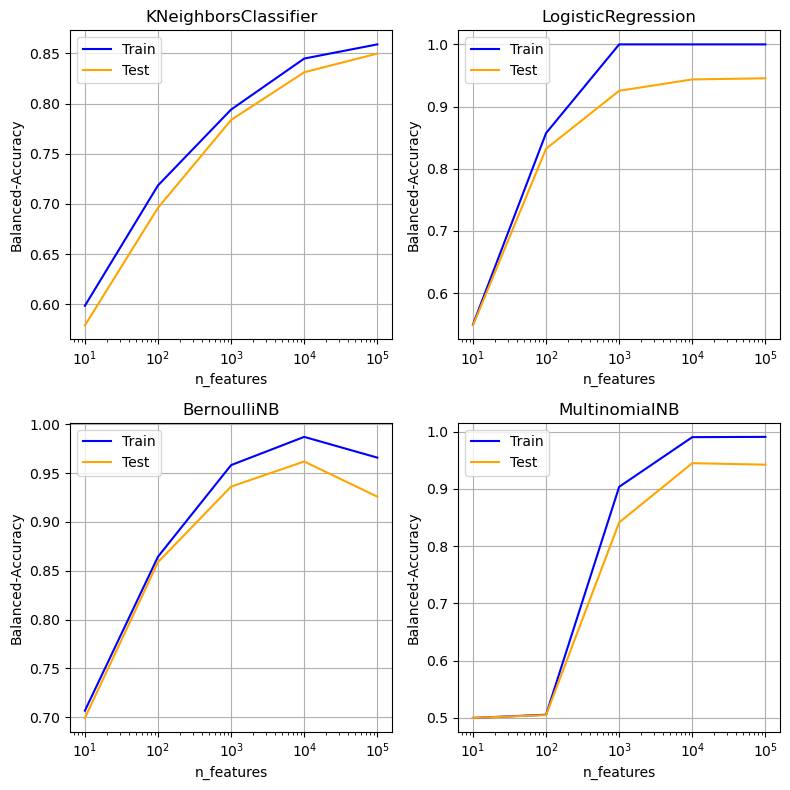

In [38]:
plt.figure(4, figsize=[8, 8])

plt.subplot(2,2,1)
plt.title("KNeighborsClassifier")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), neighbors_grid_hash.cv_results_["mean_train_balanced_accuracy"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), neighbors_grid_hash.cv_results_["mean_test_balanced_accuracy"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,2)
plt.title("LogisticRegression")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), logistic_grid_hash.cv_results_["mean_train_balanced_accuracy"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), logistic_grid_hash.cv_results_["mean_test_balanced_accuracy"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,3)
plt.title("BernoulliNB")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), bern_grid_hash.cv_results_["mean_train_balanced_accuracy"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), bern_grid_hash.cv_results_["mean_test_balanced_accuracy"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,4)
plt.title("MultinomialNB")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), poly_grid_hash.cv_results_["mean_train_balanced_accuracy"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), poly_grid_hash.cv_results_["mean_test_balanced_accuracy"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()
plt.show()

plt.show()

Общая тенденция заключается в том, что с ростом признаков растёт и точность модели. Однако модель Бернулли показывает, что этот рост не является бесконечным и при достижении определённого порога качество модели может начать снижаться. Рассмотрим зависимость метрики Recall на рисунке 5.

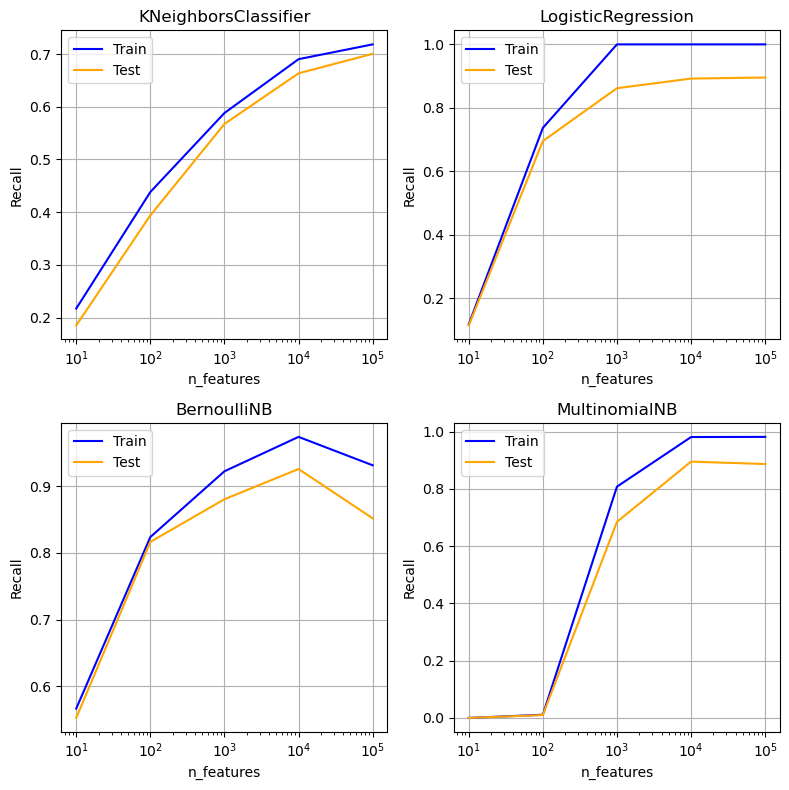

In [39]:
plt.figure(5, figsize=[8, 8])

plt.subplot(2,2,1)
plt.title("KNeighborsClassifier")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), neighbors_grid_hash.cv_results_["mean_train_recall"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), neighbors_grid_hash.cv_results_["mean_test_recall"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,2)
plt.title("LogisticRegression")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), logistic_grid_hash.cv_results_["mean_train_recall"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), logistic_grid_hash.cv_results_["mean_test_recall"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,3)
plt.title("BernoulliNB")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), bern_grid_hash.cv_results_["mean_train_recall"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), bern_grid_hash.cv_results_["mean_test_recall"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,4)
plt.title("MultinomialNB")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), poly_grid_hash.cv_results_["mean_train_recall"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), poly_grid_hash.cv_results_["mean_test_recall"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()
plt.show()

plt.show()

Как видно из графиков, метрика recall улучшается с ростом числа признаков, однако не до бесконечности. Наилучших значений метрики достигают мультиномиальная модель наивного байеса и логистическая регрессия. Худший результат показывает модель k-ближайших соседей.

Рассмотрим зависимость Precision на рисунке 6.

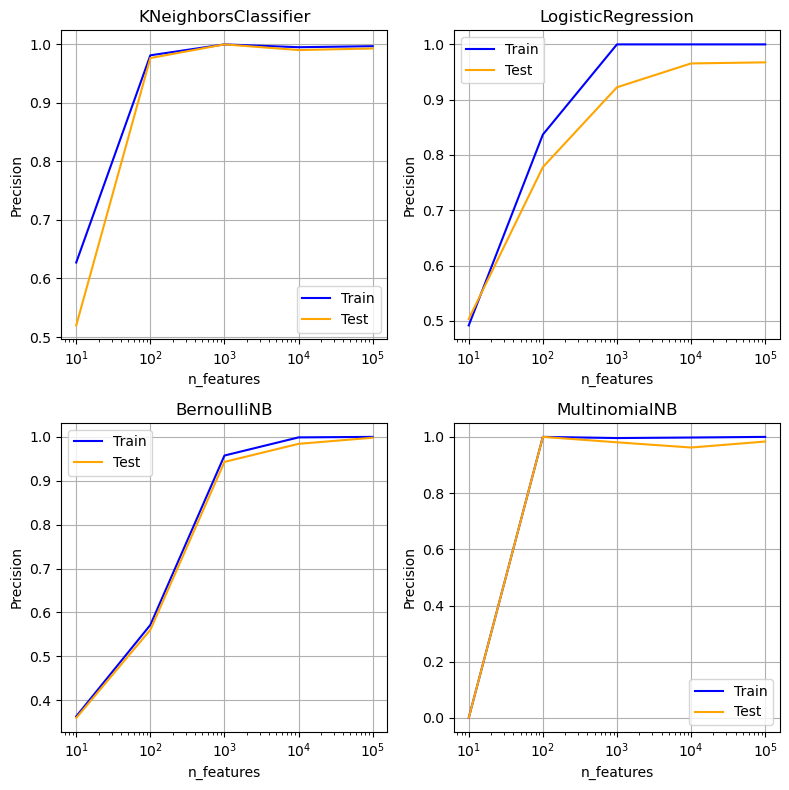

In [40]:
plt.figure(6, figsize=[8, 8])

plt.subplot(2,2,1)
plt.title("KNeighborsClassifier")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), neighbors_grid_hash.cv_results_["mean_train_precision"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), neighbors_grid_hash.cv_results_["mean_test_precision"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,2)
plt.title("LogisticRegression")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), logistic_grid_hash.cv_results_["mean_train_precision"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), logistic_grid_hash.cv_results_["mean_test_precision"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,3)
plt.title("BernoulliNB")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), bern_grid_hash.cv_results_["mean_train_precision"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), bern_grid_hash.cv_results_["mean_test_precision"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,4)
plt.title("MultinomialNB")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), poly_grid_hash.cv_results_["mean_train_precision"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), poly_grid_hash.cv_results_["mean_test_precision"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()
plt.show()

plt.show()

Из сравнения графиков видно, что лучших значений метрики precision достигает модель Бернулли, хоть и отрыв от других моделей совсем невелик (при этом начальное значение метрики самое высокое из всех моделей). Модель k-ближайших соседей всё так же отстаёт от других моделей.

Рассмотрим зависимость метрики F1 на рисунке 7.

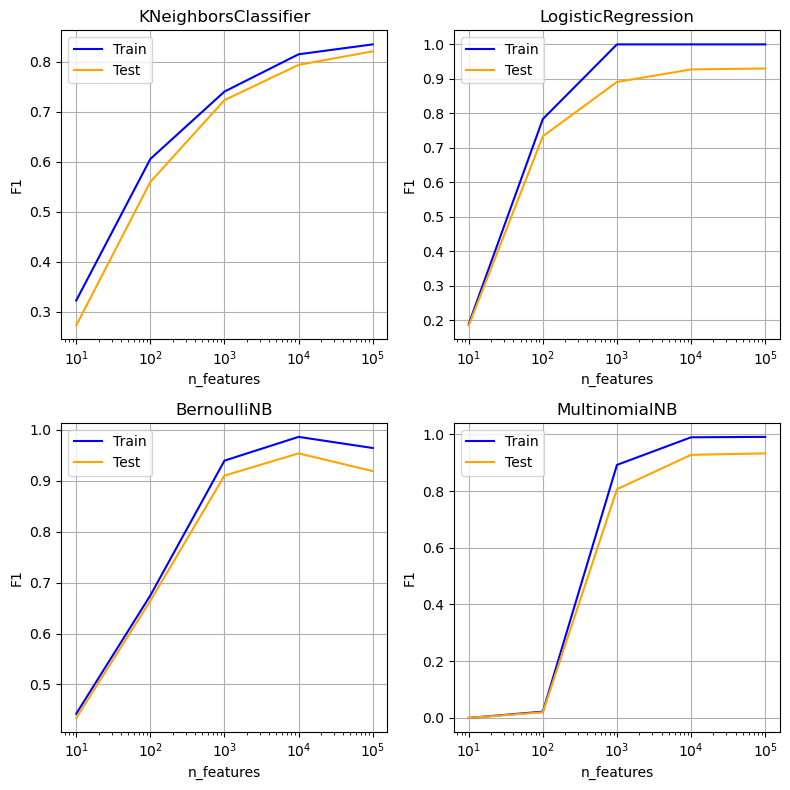

In [41]:
plt.figure(7, figsize=[8, 8])

plt.subplot(2,2,1)
plt.title("KNeighborsClassifier")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), neighbors_grid_hash.cv_results_["mean_train_f1"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), neighbors_grid_hash.cv_results_["mean_test_f1"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("F1")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,2)
plt.title("LogisticRegression")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), logistic_grid_hash.cv_results_["mean_train_f1"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), logistic_grid_hash.cv_results_["mean_test_f1"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("F1")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,3)
plt.title("BernoulliNB")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), bern_grid_hash.cv_results_["mean_train_f1"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), bern_grid_hash.cv_results_["mean_test_f1"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("F1")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.subplot(2,2,4)
plt.title("MultinomialNB")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), poly_grid_hash.cv_results_["mean_train_f1"], "-", color="blue", label="Train")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), poly_grid_hash.cv_results_["mean_test_f1"], "-", color="orange", label="Test")
plt.xlabel("n_features")
plt.ylabel("F1")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()
plt.show()

plt.show()

Как видно из графиков, наилучших значений метрики достигает модель Бернулли, в то время как худшей по прежнему являпется модель k-ближайших соседей.

Рассмотрим зависимости времени обучения и предсказания от количества признаков на рисунке 8.

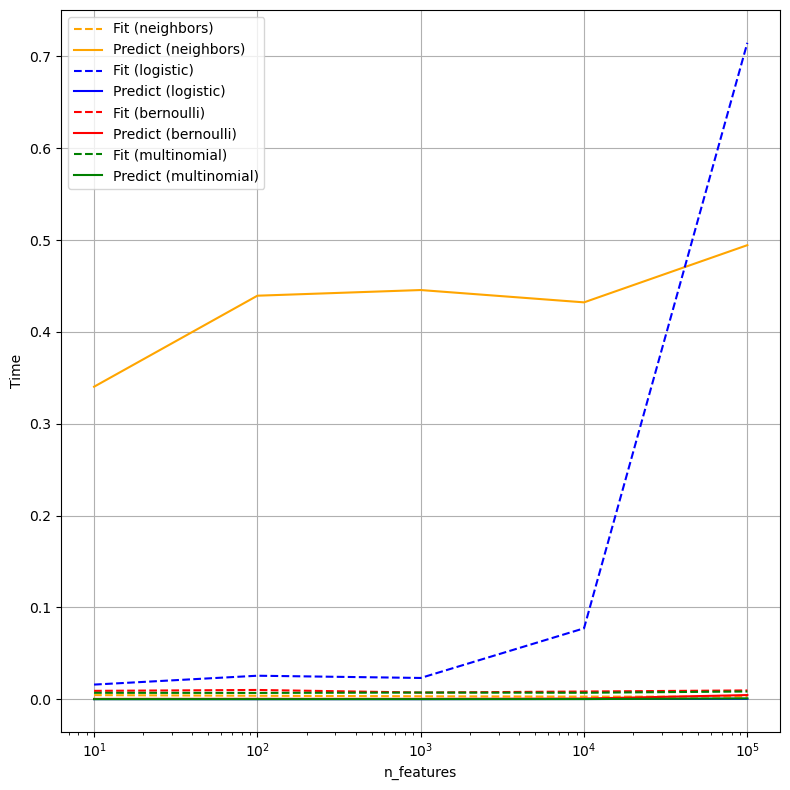

In [42]:
plt.figure(8, figsize=[8, 8])

plt.subplot(1,1,1)
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), neighbors_grid_hash.cv_results_["mean_train_fit_time"], "--", color="orange", label="Fit (neighbors)")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), neighbors_grid_hash.cv_results_["mean_test_predict_time"], "-", color="orange", label="Predict (neighbors)")

plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), logistic_grid_hash.cv_results_["mean_train_fit_time"], "--", color="blue", label="Fit (logistic)")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), logistic_grid_hash.cv_results_["mean_test_predict_time"], "-", color="blue", label="Predict (logistic)")

plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), bern_grid_hash.cv_results_["mean_train_fit_time"], "--", color="red", label="Fit (bernoulli)")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), bern_grid_hash.cv_results_["mean_test_predict_time"], "-", color="red", label="Predict (bernoulli)")

plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), poly_grid_hash.cv_results_["mean_train_fit_time"], "--", color="green", label="Fit (multinomial)")
plt.plot(np.logspace(1, 5, 5, base=10, dtype=int), poly_grid_hash.cv_results_["mean_test_predict_time"], "-", color="green", label="Predict (multinomial)")
plt.xlabel("n_features")
plt.ylabel("Time")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()

plt.show()

Из графика видно, что на время предсказания количество признаков практически не влияет, кроме как для модели логистической регрессии: её время обучения линейно (при рассмотрении без логарифмической шкалы) зависит от числа признаков. Время предсказания модели k-ближайших соседей значительно превышает время предсказания других моделей, при этом явная зависимость от количества признаков не наблюдается. 

Построим датафрейм с лучшими параметрами и метриками для каждой модели.

In [43]:
data = [best_metrics(neighbors_grid_hash, X_test, y_test, "KNeighborsClassifier", (1,1)),
        best_metrics(logistic_grid_hash, X_test, y_test, "LogisticRegression", (1,1)),
        best_metrics(bern_grid_hash, X_test, y_test, "BernoulliNB", (1,1)),
        best_metrics(poly_grid_hash, X_test, y_test, "MultinomialNB", (1,1))]

res_hash = pd.DataFrame(data)
res_hash

,Model,M-gram range,Best param,Fit time,Predict time,balanced_accuracy,Reacll,Precision,F1
0,KNeighborsClassifier,"(1, 1)",{'hasher__n_features': 100000},0.005800,0.650197,0.862225,0.725490,0.991071,0.837736
1,LogisticRegression,"(1, 1)",{'hasher__n_features': 100000},0.861256,0.000583,0.955437,0.915033,0.972222,0.942761
2,BernoulliNB,"(1, 1)",{'hasher__n_features': 10000},0.009813,0.000882,0.966281,0.934641,0.986207,0.959732
3,MultinomialNB,"(1, 1)",{'hasher__n_features': 10000},0.009106,0.000279,0.949571,0.908497,0.939189,0.923588


По таблице видно, что дольше всего обучалась модель линейной регрессии. Самой быстрой по прежнему является модель `KNeighborsClassifier`, однако теперь разница с наивным байесом не так велика, как ранее. Время обучения моделей наивного байеса значительно сократилось за счёт использования `HashingVectorizer`. Время предсказания при этом возросло, кроме как для модели k-ближайших соседей. Значения метрик в целом остались без изменений.

### Выводы

Использование `hashingvectorizer` позволяет для многих моделей сократить время обучения и даже время предсказания для модели k-ближайших соседей, снижая влияние её главного недостатка. При этом при подборе правильного количества признков значение метрик не падает.  

# Вывод

Изучены модели для классификации, использованные для классификации текстов. Изучение производилось на датасете СМС-сообщений с определением спама среди них.

Изучены метрики для определения качества классификации. В данной задаче Balanced-Accuracy отражает долю правильных классификаций, Precision отражает количество ошибочно помеченных как спам сообщений, Recall отражает долю не распознанного спама. 

Установлено, что модель k-ближайших соседей обладает очень малым временем обучения, но при этом значительно большим временем предсказания в сравнении с остальными моделями. Эта модель чаще всего обладает самыми низкими показателями качества.

Модель линейной регрессии чаще всего обладает самым большим временем обучения и немалым временем предсказания. Однако при этом значения метрик одни из самых высоких. Конкуренцию этой модели составляет наивный Байес на основе модели Бернулли, который обладает малым временем обучения и предсказания.

Произведена оценка качества моделей с помощью отложенной выборки и кросс-валидации. Произведён выбор значений гиперпараметров с помощью `GridSearchCV`.

Произведена оценка влияния количества признаков FeatureHasher на качество классификации. Установлено, что с увеличением количества признаков растёт и качество моделей до определённого предела. Установлено, что использование FeatureHasher позволяет сократить время обучения и время предсказания в некоторых случаях.

При выборе модели для классификации текстов мой выбор склонялся бы к модели `BrenoulliNB`: k-ближайших соседей требуют много времени для предсказания и обладают низкими значениями метрик; логистическая регрессия медленно обучается при большом числе признаков; `MultinomialNB` зачастую обладает чуть меньшей точностью и другими метриками.